This Notebook will be used for the IBM Data Science Capstone Project

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


<h1> Importing Data </h1>

Importing collission data provided by 

In [3]:
df_raw=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h1>Exploratory Analysis</h1>
<p>Exploring the data to see the underlying patterns or any peculiarities that might be of interest to the end-user or that might be useful in further analysis.

In [6]:
df_raw.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [21]:
df_raw.shape

(194673, 38)

In [7]:
df_raw.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


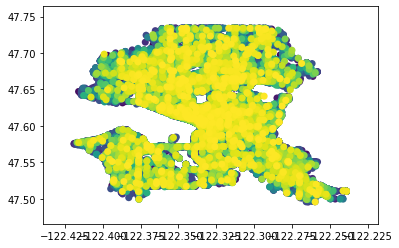

In [10]:
#Heatmap to show the distribution of collissions geographically  
from scipy.stats import gaussian_kde
x=df_raw['X'].dropna()[0:50000]
y=df_raw['Y'].dropna()[0:50000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50, edgecolor='')
plt.show()

In [13]:
df_raw['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [14]:
df_raw['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [15]:
df_raw['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [16]:
df_raw['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [17]:
df_raw['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [18]:
df_raw['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [22]:
df_raw['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [23]:
df_raw['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
CALIFORNIA AVE SW BETWEEN SW SULLIVAN ST AND DEAD END 1             1
W BERTONA ST BETWEEN 32ND AVE W AND 33RD AVE W                      1
N 42ND ST BETWEEN BAGLEY AVE N AND CORLISS AVE N                    1
19TH AVE NW AND NW 77TH ST                                          1
N 122ND ST BETWEEN 1ST AVE NW AND PALATINE AVE N                    1
Name: LOCATION, Length: 24102, dtype: int64

<h2>Preprocessing</h2>

Selecting relevant features and feature engineering to add weekday and hour of the day variables.

In [26]:
df=df_raw[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','UNDERINFL','INATTENTIONIND','SPEEDING','X','Y']]
df['DAY']=pd.to_datetime(df_raw['INCDATE']).dt.weekday
df['HOUR']=pd.to_datetime(df_raw['INCDTTM']).dt.hour
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,INATTENTIONIND,SPEEDING,X,Y,DAY,HOUR
0,2,Overcast,Wet,Daylight,N,NaN,NaN,-122.323148,47.703140,2,14
1,1,Raining,Wet,Dark - Street Lights On,0,NaN,NaN,-122.347294,47.647172,2,18
2,1,Overcast,Dry,Daylight,0,NaN,NaN,-122.334540,47.607871,3,10
3,1,Clear,Dry,Daylight,N,NaN,NaN,-122.334803,47.604803,4,9
4,2,Raining,Wet,Daylight,0,NaN,NaN,-122.306426,47.545739,2,8


In [27]:
#filtering out collisions involving driving under influence, speeding, and inattention to better 
#understand the effect of weather and light conditions.
df_filtered=pd.DataFrame()
df_filtered=df[df.SPEEDING!='Y']
df_filtered=df_filtered[df.INATTENTIONIND!='Y']
df_filtered=df_filtered[df.UNDERINFL!='Y']
df_filtered=df_filtered[df.UNDERINFL!='1']
df_filtered.drop(columns=['SPEEDING','INATTENTIONIND','UNDERINFL'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,X,Y,DAY,HOUR
0,2,Overcast,Wet,Daylight,-122.323148,47.703140,2,14
1,1,Raining,Wet,Dark - Street Lights On,-122.347294,47.647172,2,18
2,1,Overcast,Dry,Daylight,-122.334540,47.607871,3,10
3,1,Clear,Dry,Daylight,-122.334803,47.604803,4,9
4,2,Raining,Wet,Daylight,-122.306426,47.545739,2,8
...,...,...,...,...,...,...,...,...
194666,2,Clear,Wet,Daylight,-122.344569,47.694547,4,13
194668,2,Clear,Dry,Daylight,-122.290826,47.565408,0,8
194670,2,Clear,Dry,Daylight,-122.306689,47.683047,5,9
194671,2,Clear,Dry,Dusk,-122.355317,47.678734,1,16


<h2>Insight</h2>

Analyze data and draw insight

Text(0.5, 1.0, 'Number of collisions per hour of the day')

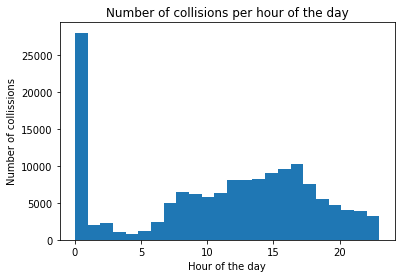

In [36]:
#Histogram to show the distribution of collissions over hours of the day
plt.hist(df_filtered['HOUR'],bins=24)
plt.xlabel("Hour of the day")
plt.ylabel("Number of collissions")
plt.title("Number of collisions per hour of the day")

Text(0.5, 1.0, 'Number of collisions per day of the week')

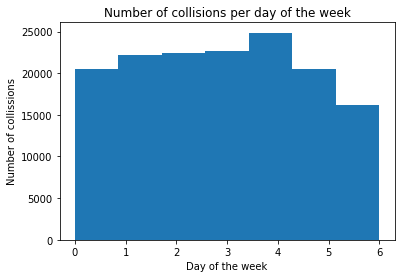

In [37]:
plt.hist(df_filtered['DAY'],bins=7)
plt.xlabel("Day of the week")
plt.ylabel("Number of collissions")
plt.title("Number of collisions per day of the week")

In [89]:
w_effect=df.groupby('WEATHER')['SEVERITYCODE'].value_counts()
w_effect=w_effect.to_frame()
print(w_effect)

                                       SEVERITYCODE
WEATHER                  SEVERITYCODE              
Blowing Sand/Dirt        1                       41
                         2                       15
Clear                    1                    75295
                         2                    35840
Fog/Smog/Smoke           1                      382
                         2                      187
Other                    1                      716
                         2                      116
Overcast                 1                    18969
                         2                     8745
Partly Cloudy            2                        3
                         1                        2
Raining                  1                    21969
                         2                    11176
Severe Crosswind         1                       18
                         2                        7
Sleet/Hail/Freezing Rain 1                       85
            

In [90]:
percentage=[]
prev=1
total=1
for n in range(len(w_effect)):
    if (n%2)==0:
        prev=w_effect.iloc[n,0]
    else:
        total=w_effect.iloc[n,0]+prev
        percentage.append((prev/total)*100)
        percentage.append((w_effect.iloc[n,0]/total)*100)

In [91]:
w_effect['SEVERITYDISTR']=percentage
print(w_effect)

                                       SEVERITYCODE  SEVERITYDISTR
WEATHER                  SEVERITYCODE                             
Blowing Sand/Dirt        1                       41      73.214286
                         2                       15      26.785714
Clear                    1                    75295      67.750934
                         2                    35840      32.249066
Fog/Smog/Smoke           1                      382      67.135325
                         2                      187      32.864675
Other                    1                      716      86.057692
                         2                      116      13.942308
Overcast                 1                    18969      68.445551
                         2                     8745      31.554449
Partly Cloudy            2                        3      60.000000
                         1                        2      40.000000
Raining                  1                    21969      66.28

In [49]:
lc_effect=df.groupby('LIGHTCOND')['SEVERITYCODE'].value_counts()
lc_effect=lc_effect.to_frame()
print(lc_effect)

                                       SEVERITYCODE
LIGHTCOND                SEVERITYCODE              
Dark - No Street Lights  1                     1203
                         2                      334
Dark - Street Lights Off 1                      883
                         2                      316
Dark - Street Lights On  1                    34032
                         2                    14475
Dark - Unknown Lighting  1                        7
                         2                        4
Dawn                     1                     1678
                         2                      824
Daylight                 1                    77593
                         2                    38544
Dusk                     1                     3958
                         2                     1944
Other                    1                      183
                         2                       52
Unknown                  1                    12868
            

In [93]:
percentage=[]
prev=1
total=1
for n in range(len(lc_effect)):
    if (n%2)==0:
        prev=lc_effect.iloc[n,0]
    else:
        total=lc_effect.iloc[n,0]+prev
        percentage.append((prev/total)*100)
        percentage.append((lc_effect.iloc[n,0]/total)*100)

In [94]:
lc_effect['SEVERITYDISTR']=percentage
print(lc_effect)

                                       SEVERITYCODE  SEVERITYDISTR
LIGHTCOND                SEVERITYCODE                             
Dark - No Street Lights  1                     1203      78.269356
                         2                      334      21.730644
Dark - Street Lights Off 1                      883      73.644704
                         2                      316      26.355296
Dark - Street Lights On  1                    34032      70.158946
                         2                    14475      29.841054
Dark - Unknown Lighting  1                        7      63.636364
                         2                        4      36.363636
Dawn                     1                     1678      67.066347
                         2                      824      32.933653
Daylight                 1                    77593      66.811610
                         2                    38544      33.188390
Dusk                     1                     3958      67.06

In [95]:
rc_effect=df.groupby('ROADCOND')['SEVERITYCODE'].value_counts()
rc_effect=rc_effect.to_frame()
print(rc_effect)

                             SEVERITYCODE
ROADCOND       SEVERITYCODE              
Dry            1                    84446
               2                    40064
Ice            1                      936
               2                      273
Oil            1                       40
               2                       24
Other          1                       89
               2                       43
Sand/Mud/Dirt  1                       52
               2                       23
Snow/Slush     1                      837
               2                      167
Standing Water 1                       85
               2                       30
Unknown        1                    14329
               2                      749
Wet            1                    31719
               2                    15755


In [96]:
percentage=[]
prev=1
total=1
for n in range(len(rc_effect)):
    if (n%2)==0:
        prev=rc_effect.iloc[n,0]
    else:
        total=rc_effect.iloc[n,0]+prev
        percentage.append((prev/total)*100)
        percentage.append((rc_effect.iloc[n,0]/total)*100)

In [97]:
rc_effect['SEVERITYDISTR']=percentage
print(rc_effect)

                             SEVERITYCODE  SEVERITYDISTR
ROADCOND       SEVERITYCODE                             
Dry            1                    84446      67.822665
               2                    40064      32.177335
Ice            1                      936      77.419355
               2                      273      22.580645
Oil            1                       40      62.500000
               2                       24      37.500000
Other          1                       89      67.424242
               2                       43      32.575758
Sand/Mud/Dirt  1                       52      69.333333
               2                       23      30.666667
Snow/Slush     1                      837      83.366534
               2                      167      16.633466
Standing Water 1                       85      73.913043
               2                       30      26.086957
Unknown        1                    14329      95.032498
               2               